# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [18]:
medical.shape

(1338, 8)

In [19]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows a large peak for values under 15,000 dollars, with a much smaller  between 33,000 and 52,000 dollars. The mean and standard deviation are close to each other, and also quite high, indicating that there is a large spread of values in the data. The curve is not approximately normal, and the standard deviation tells us we have quite a few very high and very low values with respect to the mean. These statistics are not appropriate for the data.

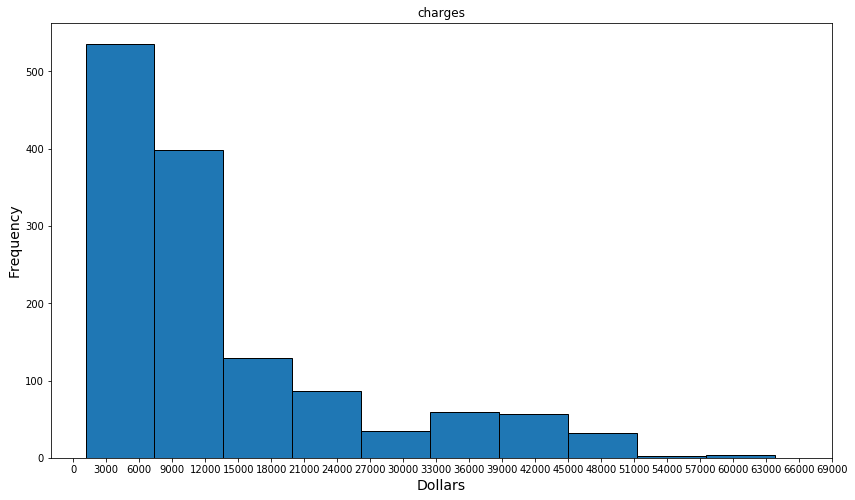

In [24]:
medical.hist(column= 'charges', bins=10, grid = False,
                figsize=(14,8), xlabelsize=10, edgecolor='k')
plt.xticks(range(0, 70000, 3000))
plt.xlabel('Dollars', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [21]:
max(medical.charges)

63770.42801

In [22]:
med_mean = round(medical.charges.mean(), 2)
med_std = round(medical.charges.std(), 2)
print("mean: ", med_mean, "standard deviation: ", med_std)

mean:  13270.42 standard deviation:  12110.01


In [23]:
med_med = round(medical.charges.median(), 2)
print("Median charges is ", med_med)

Median charges is  9382.03


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The mean is 13270.42, which is not much higher than 12000. Looking at the histogram, it seems that values in the range of 10000 to 15000, but we are unable to tell if it is less than 12000.

Based on the assumption that these data represent a random sample of charges, we can use the Central Limit Theorem to sample many times, then use the mean charge to determine the answer to the question "What is the probability of a charge less than 12000?"

To do this, we would need to do many more samples. See code below.

In [26]:
m_npy = medical.charges.to_numpy()

seed(47)
many_sample_mean = []

#Calculate mean 150 times from dataset
for n in range(100):
    single_sample = np.random.choice(m_npy, 50)
    many_sample_mean.append(np.mean(single_sample))
    
mean_smeans = np.mean(many_sample_mean)
std_means = np.std(many_sample_mean)

print('mean:', mean_means, '\nstandard deviation:', std_means)

mean: 13326.1059319732 
standard deviation: 1468.370884810995


The resampled mean has not changed much, but the standard deviation of the sample means has shrunk considerably. Using this, we would then want to calculate the probability of getting a charge less than 12000.

In [27]:
norm.cdf(12000, loc=13326, scale=1476)

0.18449310083302167

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ An appropriate confidence interval in this case is a 95% confidence interval that is one-sided (less than). This allows us to obtain a tighter lower bound on the sample mean.

The critical z value for a 95% confidence interval is 1.96

margin of error = critical value * population standard deviation

ci = mean +/- (margin of error/square root of sample size)

In [29]:
z = 1.96
st_dev = 1468
sample_size = 1338
mean = 13326

moe = (z * st_dev) / np.sqrt(sample_size)

print("The 95% confidence interval is :", mean - moe, "<" , mean , "<" , mean + moe)

The 95% confidence interval is : 13247.339976789859 < 13326 < 13404.660023210141


The hospital administrator should not be worried yet, as we are 95% confident that the mean charge is not lower than 13247, which is still higher than 12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that there is no difference between how much people with insurance are charged and how much people without insurance are charged. That is, the average charge of uninsured and insured folks is the same.

The alternative hypothesis would be that uninsured folks are charged more (or less) than those with insurance.

These hypotheses assume that the variance of the two groups is roughly the same, and that these two groups can be combined.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [30]:
#not insured
ins0 = medical.loc[medical.insuranceclaim == 0]

#insured
ins1 = medical.loc[medical.insuranceclaim == 1]

In [33]:
n0 = len(ins0)
s0 = (ins0.charges.std())
x0 = (ins0.charges.mean())

n1 = len(ins1)
s1 = (ins1.charges.std())
x1 = (ins1.charges.mean())

print("Uninsured:\n", 'count:', n0, 'mean: ', x0, 'std. dev: ', s0)
print("Insured:\n", 'count:', n1, 'mean: ', x1, 'std. dev: ', s1)

a = (n0 - 1)*s0**2
b = (n1 -1)*s1**2
dof = (n0 + n1 - 2)

std_pooled = np.sqrt((a + b) / dof)
print("dof: ", dof, "\npooled standard deviation: ", std_pooled)

t_stat = ((x0 - x1) / (std_pooled * np.sqrt(1/n0 + 1/n1)))

print('\n stat: ', t_stat)

Uninsured:
 count: 555 mean:  8821.421892306294 std. dev:  6446.510126811736
Insured:
 count: 783 mean:  16423.928276537663 std. dev:  14045.928418802127
dof:  1336 
pooled standard deviation:  11520.034268775256

 stat:  -11.89329903087671


In [36]:
cdf = stats.t.cdf(t_stat, df=dof)

p_value = 2 * cdf

print("p value: ", p_value)

p value:  4.461230231620972e-31


In [38]:
t_stat, p_value = stats.ttest_ind(ins0.charges, ins1.charges)
print("t stat: ", t_stat, "\np value: ", p_value)

t stat:  -11.893299030876712 
p value:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ Use the equal_var argument

In [40]:
t_stat, p_val = stats.ttest_ind(ins0.charges, ins1.charges, equal_var = False)
print("t stat: ", t_stat, "\np value: ", p_value)

t stat:  -13.298031957975649 
p value:  4.461230231620717e-31


The p value is even smaller when the function does not assume equal variance. This makes more sense given that the distribution is very much so not normal, so the variances are probably not equal.

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy stats has a zscore method for a z test. It calculates the z score of each value in a sample relative to the sample mean and standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test